In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
origin_data = pd.read_csv("jutaijiancai20180417-20180613.csv",encoding="ansi")

In [3]:
origin_data.columns

Index(['序号', '时间', 'G1M1_I.PV', 'SL_AI1.PV', 'G1M1_AI.PV', 'MMYW_AI1.PV',
       'TE514.PV', 'TE708.PV', 'YWJC_O2.PV', 'PT711.PV', 'HL8_AI.PV',
       'TE801.PV', 'PT801.PV', 'PT802_801.VALUE', 'MEIMO.VALUE', 'TE802.PV',
       'PT802.PV', 'TE506.PV'],
      dtype='object')

In [5]:
data1 = origin_data[["时间","TE506.PV","TE514.PV","TE708.PV","MMYW_AI1.PV"]]

In [6]:
data1.rename(columns={"时间":"time","TE506.PV":"te506","TE514.PV":"te514","TE708.PV":"te708","MMYW_AI1.PV":"mmyw_ai1"},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [7]:
data1.set_index("time",inplace=True)

In [8]:
data1.describe()

,te506,te514,te708,mmyw_ai1
count,4.962041e+06,4.963811e+06,4.963958e+06,4.963924e+06
mean,8.232978e+02,8.172206e+02,9.048207e+02,5.327427e+00
std,1.889975e+02,1.674622e+02,2.375544e+02,1.847363e+00
min,-1.255000e+01,-1.064250e+02,0.000000e+00,1.140000e-02
25%,8.660000e+02,8.112500e+02,9.048650e+02,4.927800e+00
50%,8.773500e+02,8.684500e+02,9.770150e+02,5.698200e+00
75%,8.840000e+02,8.929250e+02,1.024725e+03,6.469800e+00
max,9.958500e+02,1.210000e+03,1.243060e+03,8.751000e+00


In [9]:
decimals = pd.Series([2, 2, 2, 3], index=['te506', 'te514', 'te708','mmyw_ai1'])
data1 = data1.round(decimals)

In [10]:
data1.index = pd.to_datetime(data1.index)

In [32]:
data1.head()

,te506,te514,te708,mmyw_ai1
time,,,,
2018-04-17 00:00:00,842.75,829.38,790.01,6.012
2018-04-17 00:00:01,843.00,829.50,790.08,6.013
2018-04-17 00:00:02,843.25,829.50,790.08,6.019
2018-04-17 00:00:03,843.12,829.50,790.14,6.012
2018-04-17 00:00:04,843.12,829.50,790.27,6.012


In [33]:
3600*24

86400

In [11]:
data2 = data1.interpolate()

In [14]:
data2["2018/6/11":].head()

,te506,te514,te708,mmyw_ai1
time,,,,
2018-06-11 00:00:00,881.4,907.00,1052.80,7.365
2018-06-11 00:00:01,881.4,906.90,1052.87,7.369
2018-06-11 00:00:02,881.4,907.17,1052.80,7.376
2018-06-11 00:00:03,881.4,907.06,1052.80,7.369
2018-06-11 00:00:04,881.1,907.17,1052.74,7.372


In [224]:
data3 = data2["20180520":]

In [225]:
data3.head()

,te506,te514,te708,mmyw_ai1
time,,,,
2018-05-20 00:00:00,864.70,787.32,1002.62,4.816
2018-05-20 00:00:01,864.70,787.38,1002.69,4.815
2018-05-20 00:00:02,864.65,787.43,1002.82,4.819
2018-05-20 00:00:03,864.65,787.49,1002.88,4.823
2018-05-20 00:00:04,864.65,787.49,1002.95,4.817


In [117]:
feature = data3[["te514","te708","mmyw_ai1"]].shift(5).dropna()

In [118]:
y = data3[["te506"]]

In [119]:
y.head()

,te506
time,
2018-05-20 00:00:00,864.70
2018-05-20 00:00:01,864.70
2018-05-20 00:00:02,864.65
2018-05-20 00:00:03,864.65
2018-05-20 00:00:04,864.65


In [120]:
feature.head()

,te514,te708,mmyw_ai1
time,,,
2018-05-20 00:00:05,787.32,1002.62,4.816
2018-05-20 00:00:06,787.38,1002.69,4.815
2018-05-20 00:00:07,787.43,1002.82,4.819
2018-05-20 00:00:08,787.49,1002.88,4.823
2018-05-20 00:00:09,787.49,1002.95,4.817


In [121]:
data4 = pd.concat([y,feature],axis=1).dropna()

In [122]:
data4.head()

,te506,te514,te708,mmyw_ai1
time,,,,
2018-05-20 00:00:05,864.65,787.32,1002.62,4.816
2018-05-20 00:00:06,864.65,787.38,1002.69,4.815
2018-05-20 00:00:07,864.65,787.43,1002.82,4.819
2018-05-20 00:00:08,864.65,787.49,1002.88,4.823
2018-05-20 00:00:09,864.65,787.49,1002.95,4.817


In [89]:
data4.to_csv("te506_predict_5s.csv")

In [2]:
data4 = pd.read_csv("te506_predict_5s.csv",index_col=0)

In [4]:
data4.index = pd.to_datetime(data4.index)

In [28]:
list(data4.columns)

['te506', 'te514', 'te708', 'mmyw_ai1']

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text yticklabel objects>)

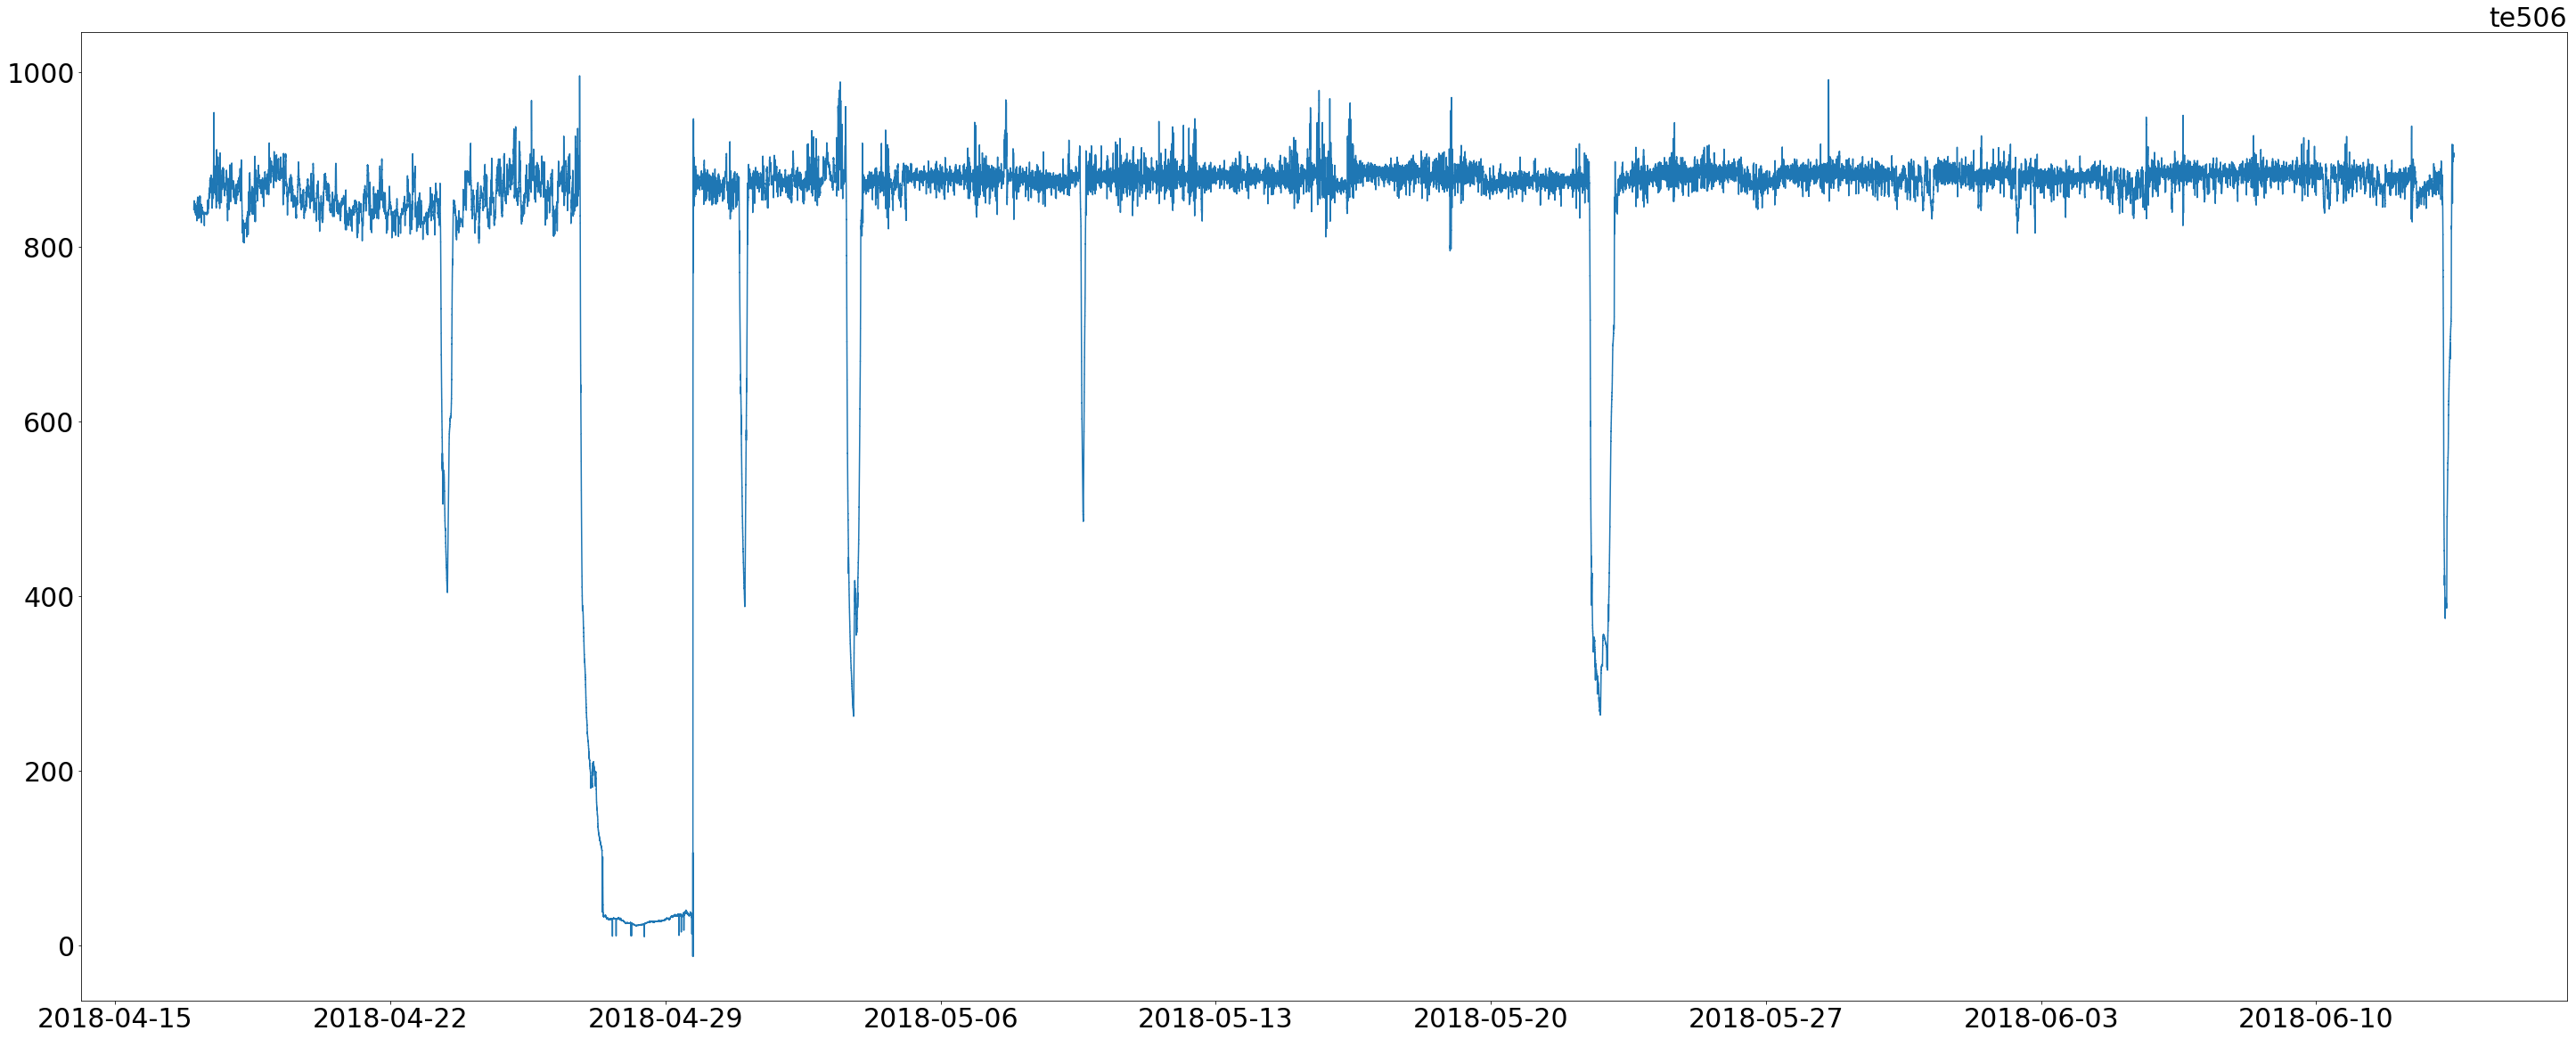

In [90]:
plt.figure(figsize=(50,20))
plt.plot(data1['te506'])
plt.title("te506",loc="right",size=30)
plt.xticks(size=30)
plt.yticks(size=30)

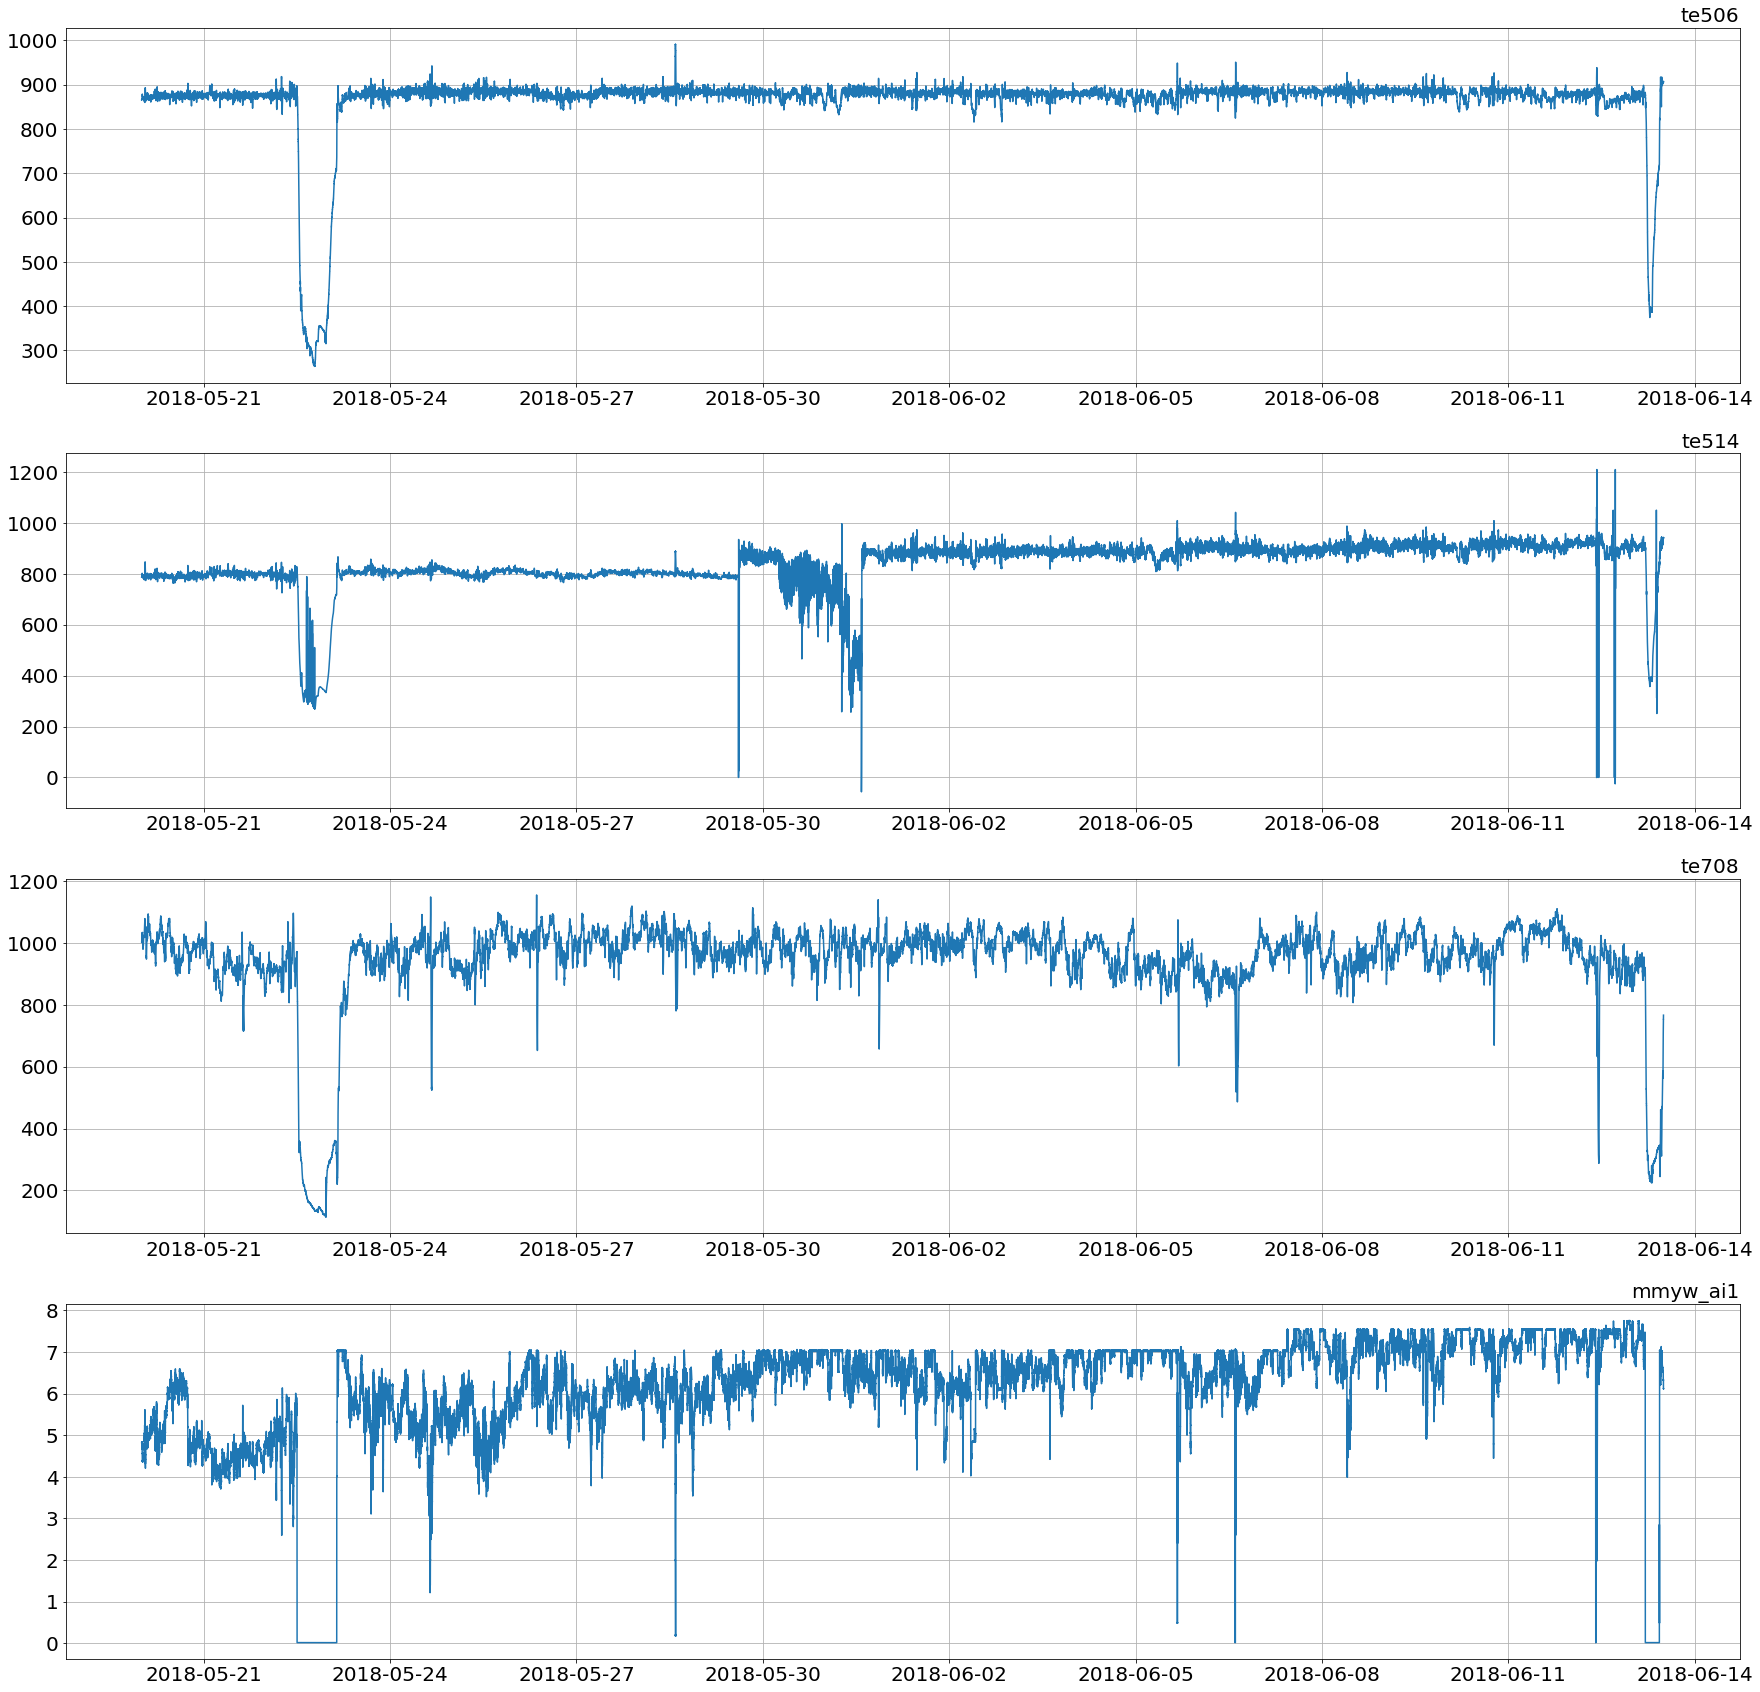

In [91]:
groups = [0,1,2,3]
plt.figure(figsize=(30,30))
for group in groups:
    plt.subplot(len(groups),1,group+1)
    plt.plot(data4.iloc[:,group])
    plt.title(list(data4.columns)[group],loc="right",size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.grid()
plt.show()

In [95]:
from sklearn.preprocessing import StandardScaler

In [123]:
scale = StandardScaler()

In [124]:
scale.fit(data4)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [125]:
data5 = scale.transform(data4)

In [126]:
data4.describe()

,te506,te514,te708,mmyw_ai1
count,2.116796e+06,2.116796e+06,2.116796e+06,2.116796e+06
mean,8.646037e+02,8.333166e+02,9.445515e+02,6.093886e+00
std,8.407074e+01,1.030619e+02,1.527986e+02,1.465652e+00
min,2.640500e+02,-5.643000e+01,1.126400e+02,1.200000e-02
25%,8.737000e+02,7.986600e+02,9.296300e+02,5.738000e+00
50%,8.801500e+02,8.633900e+02,9.761100e+02,6.452000e+00
75%,8.854500e+02,8.955100e+02,1.013350e+03,7.024000e+00
max,9.913000e+02,1.210000e+03,1.156350e+03,7.762000e+00


In [127]:
scale.mean_

array([864.60372384, 833.31655565, 944.55154156,   6.0938861 ])

In [106]:
data4.columns

Index(['te506', 'te514', 'te708', 'mmyw_ai1'], dtype='object')

In [128]:
data5 = pd.DataFrame(data5,columns=["te506","te514","te708","mmyw_ai1"])

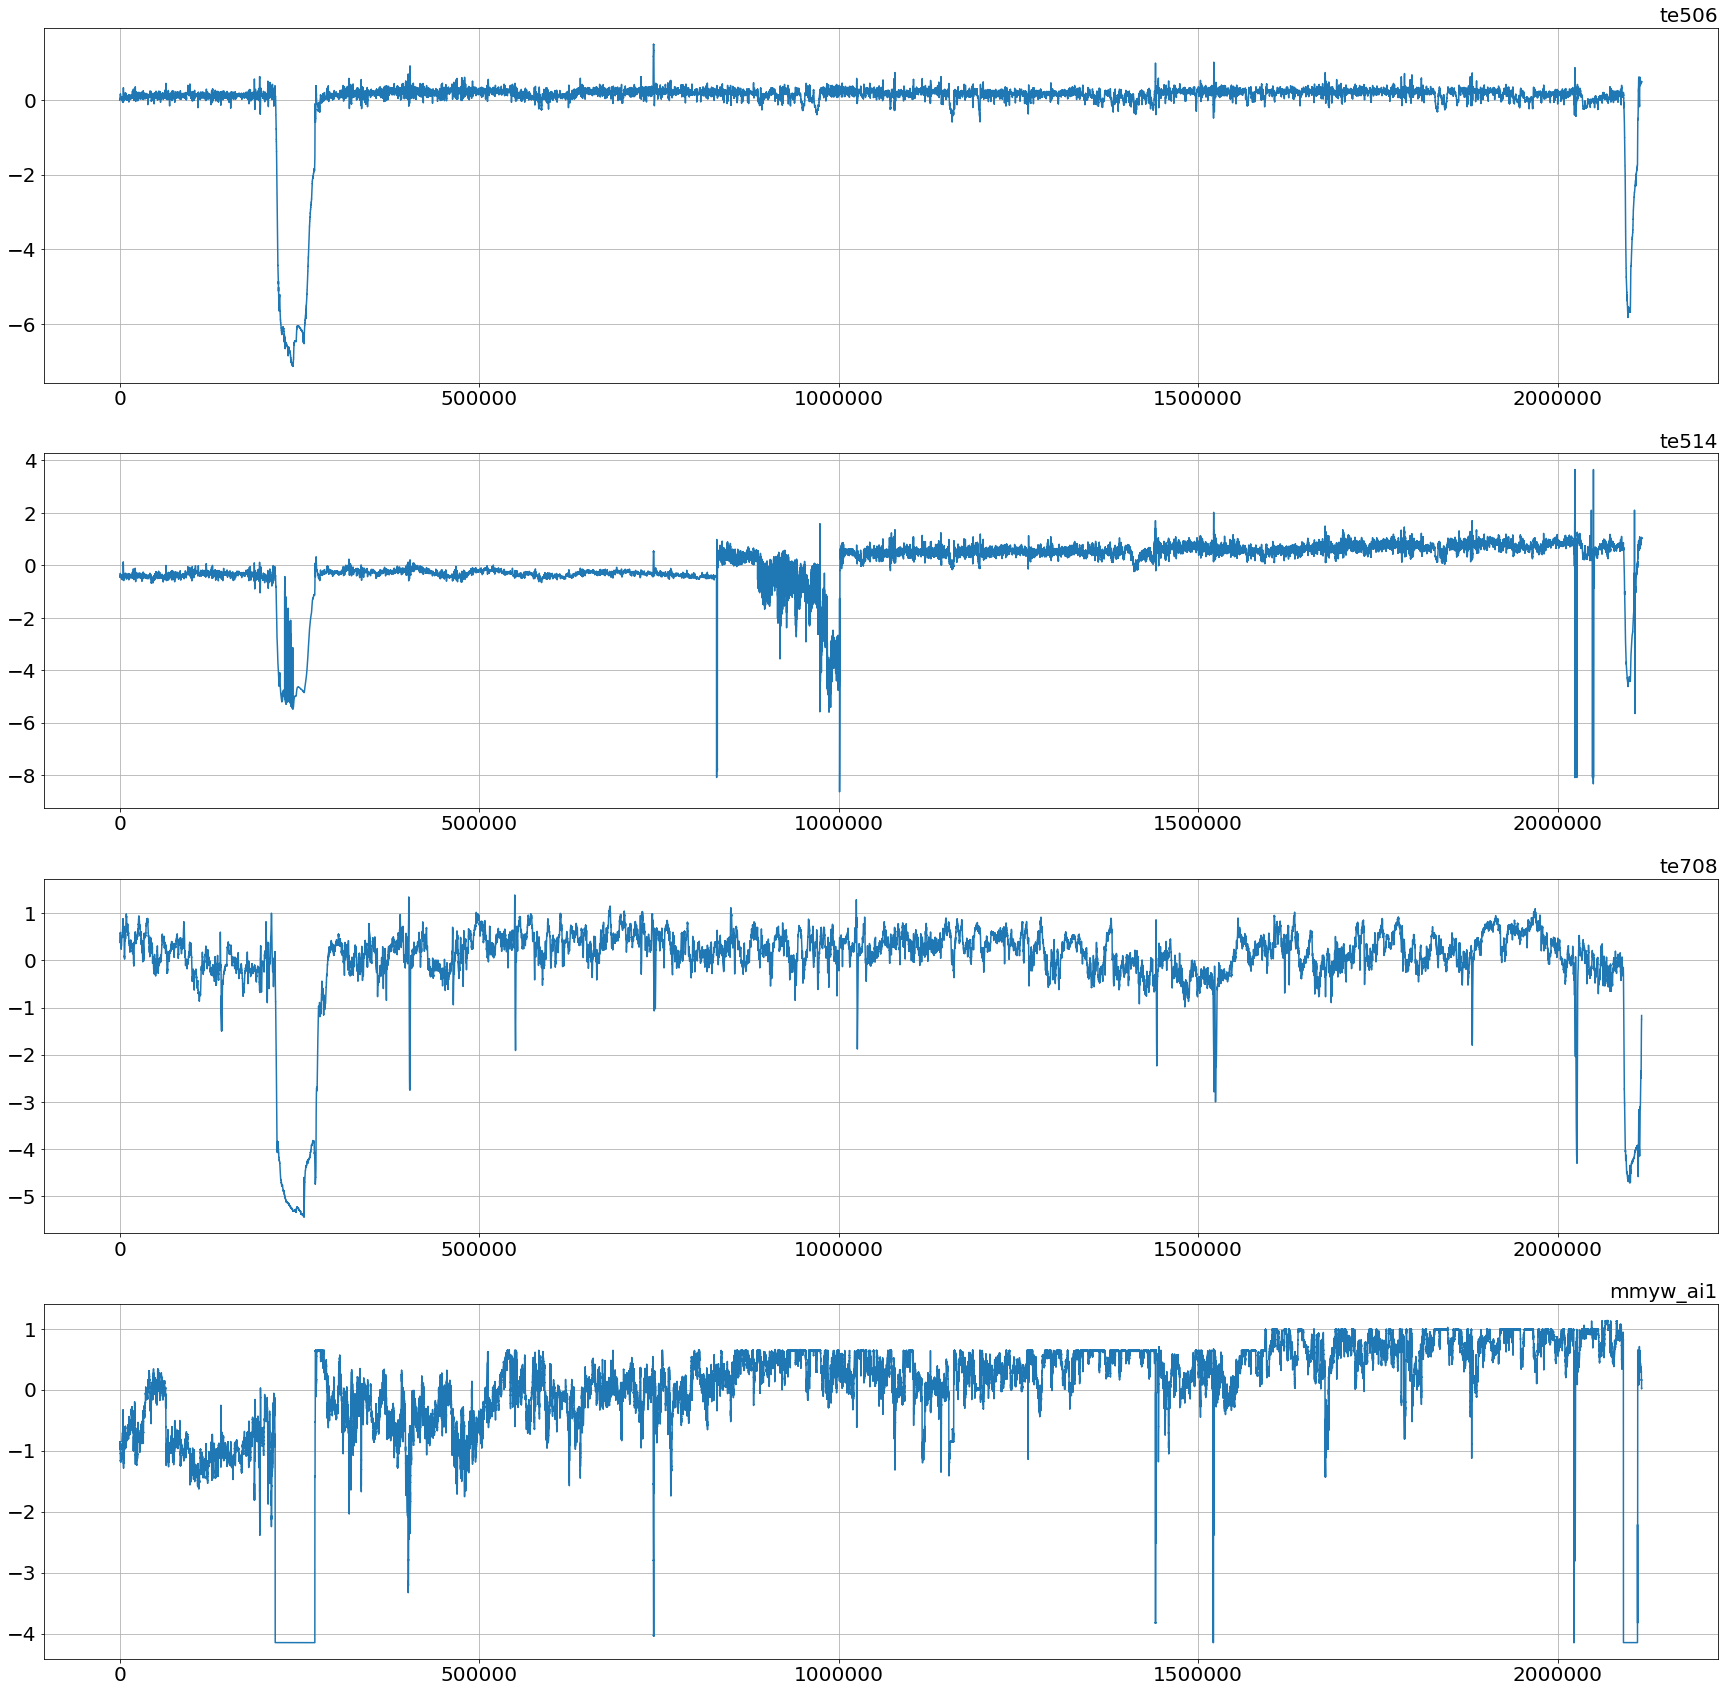

In [129]:
groups = [0,1,2,3]
plt.figure(figsize=(30,30))
for group in groups:
    plt.subplot(len(groups),1,group+1)
    plt.plot(data5.iloc[:,group])
    plt.title(list(data5.columns)[group],loc="right",size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.grid()
plt.show()

In [61]:
import datetime

In [75]:
len(pd.date_range("20180520","20180613"))

25

In [130]:
# split into train and test sets
values = data5.values
n_train_sec = 24*3600*24
train = values[:n_train_sec, :]
test = values[n_train_sec:, :]
# split into input and outputs
train_X, train_y = train[:, 1:], train[:,:1]
test_X, test_y = test[:, 1:], test[:,:1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2073600, 1, 3) (2073600, 1) (43196, 1, 3) (43196, 1)


In [131]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Train on 2073600 samples, validate on 43196 samples
Epoch 1/40
 - 40s - loss: 0.0422 - val_loss: 1.5643
Epoch 2/40
 - 37s - loss: 0.0454 - val_loss: 1.4917
Epoch 3/40
 - 37s - loss: 0.0452 - val_loss: 1.5809
Epoch 4/40
 - 37s - loss: 0.0450 - val_loss: 1.7034
Epoch 5/40
 - 36s - loss: 0.0455 - val_loss: 1.7395
Epoch 6/40
 - 37s - loss: 0.0455 - val_loss: 1.2105
Epoch 7/40
 - 35s - loss: 0.0457 - val_loss: 1.2734
Epoch 8/40
 - 36s - loss: 0.0451 - val_loss: 1.3420
Epoch 9/40
 - 37s - loss: 0.0447 - val_loss: 1.5020
Epoch 10/40
 - 36s - loss: 0.0452 - val_loss: 1.3118
Epoch 11/40
 - 36s - loss: 0.0446 - val_loss: 1.2581
Epoch 12/40
 - 36s - loss: 0.0442 - val_loss: 1.1011
Epoch 13/40
 - 36s - loss: 0.0445 - val_loss: 0.9779
Epoch 14/40
 - 36s - loss: 0.0452 - val_loss: 1.2457
Epoch 15/40
 - 36s - loss: 0.0455 - val_loss: 1.3001
Epoch 16/40
 - 37s - loss: 0.0455 - val_loss: 1.3642
Epoch 17/40
 - 36s - loss: 0.0450 - val_loss: 1.3016
Epoch 18/40
 - 36s - loss: 0.0445 - val_loss: 1.0031
Epo

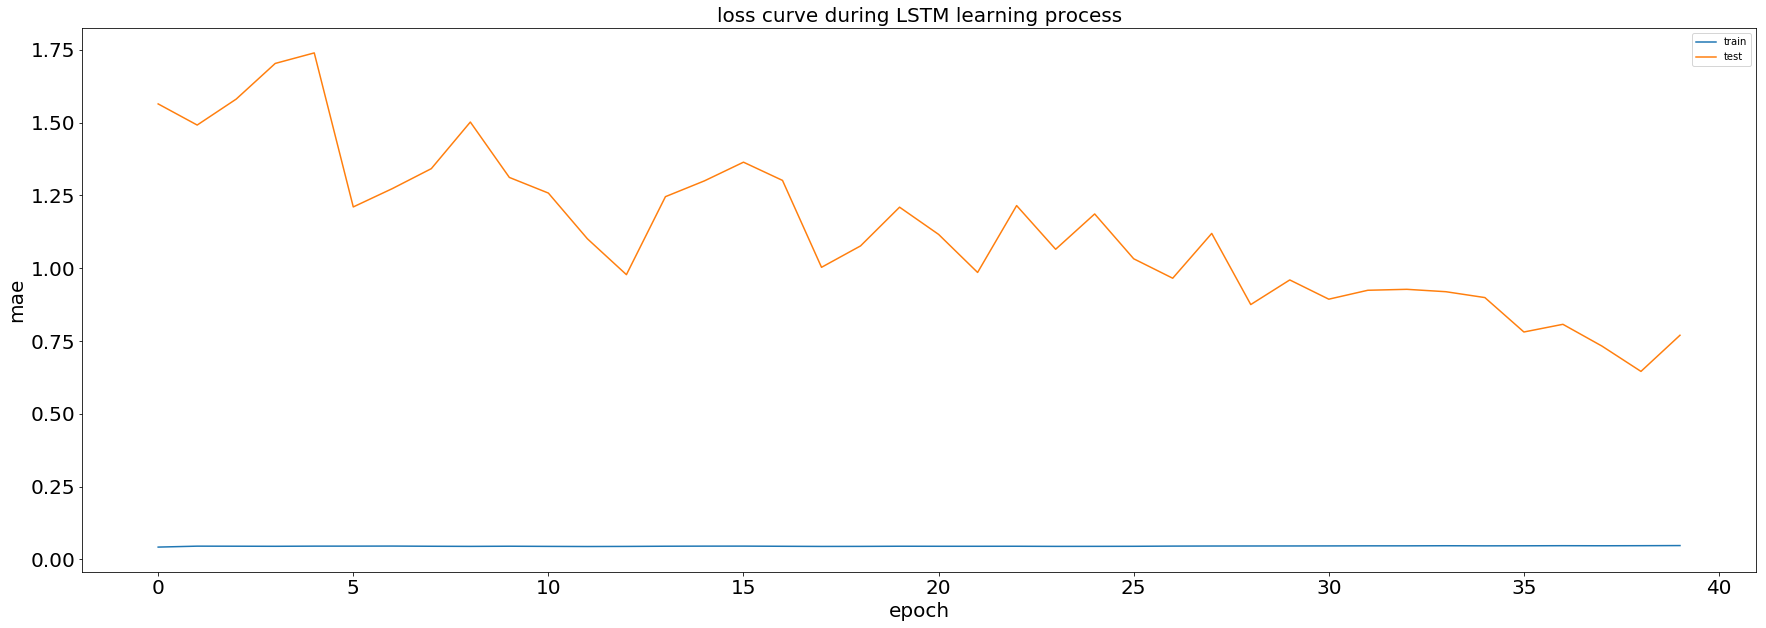

In [175]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='Nadam')
# fit network
history = model.fit(train_X, train_y, epochs=40, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.figure(figsize=(30,10))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("loss curve during LSTM learning process",size=20)
plt.xlabel("epoch",size=20)
plt.ylabel("mae",size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [176]:
predict_y = model.predict(test_X).reshape(-1)

In [177]:
test = pd.DataFrame(test_X.reshape(-1,3))

In [178]:
test = pd.concat([pd.DataFrame(test_y),test],axis=1)

In [139]:
np.std(predict_y)

0.98582834

In [204]:
data4.head()

,te506,te514,te708,mmyw_ai1
time,,,,
2018-05-20 00:00:05,864.65,787.32,1002.62,4.816
2018-05-20 00:00:06,864.65,787.38,1002.69,4.815
2018-05-20 00:00:07,864.65,787.43,1002.82,4.819
2018-05-20 00:00:08,864.65,787.49,1002.88,4.823
2018-05-20 00:00:09,864.65,787.49,1002.95,4.817


In [210]:
month = list(data4.index.month) 

In [214]:
day = list(data4.index.day)

In [223]:
data5.shape

(2116796, 4)

In [222]:
data4.shape

(2116796, 4)

In [221]:
pd.DataFrame({"month":month,"day":day}).drop_duplicates(["month","day"]).shape

(25, 2)

In [216]:
len(day)

2116796

In [179]:
predict = pd.concat([pd.DataFrame(predict_y),pd.DataFrame(test_X.reshape(-1,3))],axis=1)

In [180]:
predict = pd.DataFrame(scale.inverse_transform(predict)).iloc[:,0]

In [181]:
real = pd.DataFrame(scale.inverse_transform(test)).iloc[:,0]

In [168]:
real

0        865.70
1        865.65
2        865.65
3        865.65
4        865.65
5        865.70
6        865.70
7        865.70
8        865.75
9        865.70
10       865.70
11       865.70
12       865.65
13       865.65
14       865.65
15       865.65
16       865.70
17       865.65
18       865.65
19       865.65
20       865.65
21       865.65
22       865.65
23       865.65
24       865.65
25       865.70
26       865.65
27       865.65
28       865.65
29       865.95
          ...  
43166    906.20
43167    906.25
43168    906.25
43169    906.20
43170    906.20
43171    906.15
43172    905.95
43173    905.95
43174    905.95
43175    906.00
43176    906.00
43177    906.00
43178    905.95
43179    905.95
43180    905.95
43181    905.70
43182    905.70
43183    905.65
43184    905.65
43185    905.65
43186    905.65
43187    905.70
43188    905.65
43189    905.40
43190    905.35
43191    905.35
43192    905.40
43193    905.40
43194    905.40
43195    905.40
Name: 0, Length: 43196, 

In [198]:
np.mean(np.abs(real-predict)/real)

0.1279687060058784

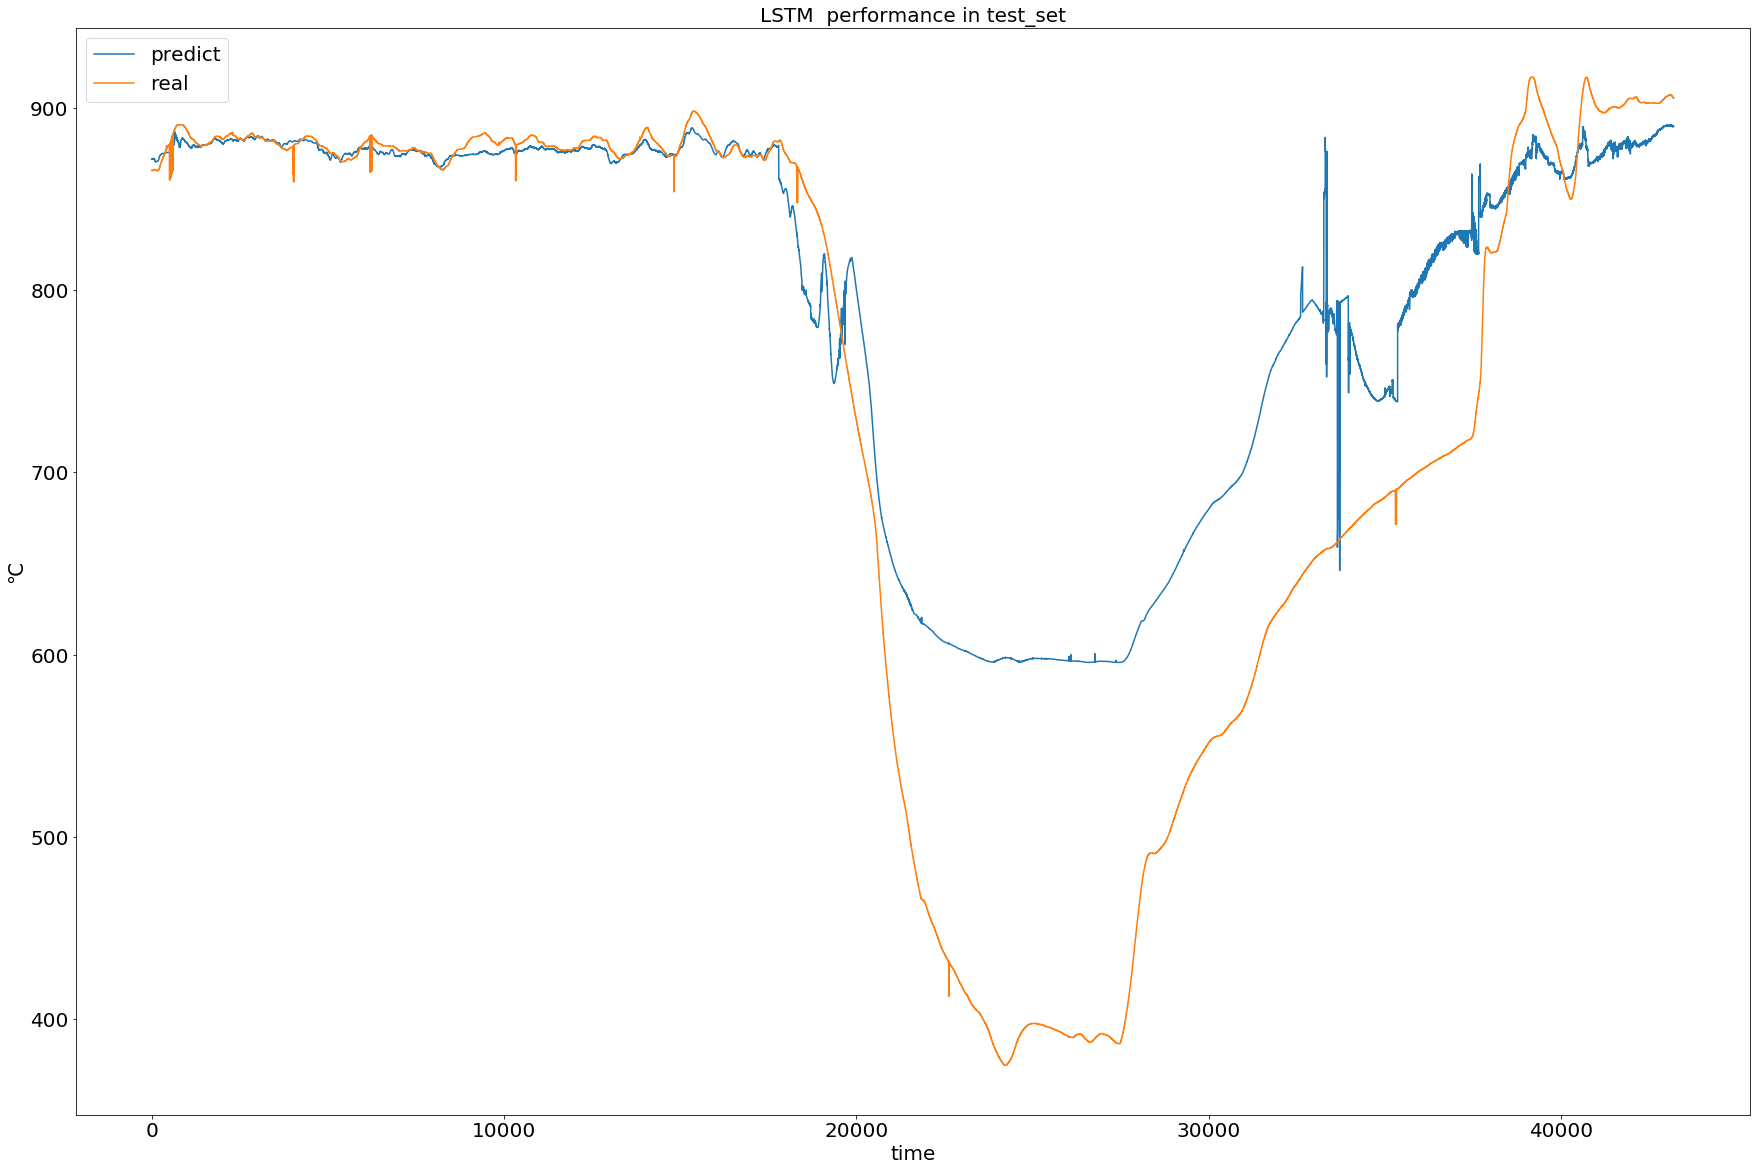

In [182]:
plt.figure(figsize=(30,20))
plt.plot(predict, label='predict')
plt.plot(real, label='real')
plt.legend()
plt.title("LSTM  performance in test_set",size=20)
plt.xlabel("time",size=20)
plt.ylabel("℃",size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20)
plt.show()
plt.savefig("epoch20_200w.png")

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [172]:
import pickle

In [173]:
filename = "basemodel_LSTM_standard.pickle"
save_model = open(filename, 'wb')

In [174]:
pickle.dump(model,save_model)
save_model.close()

TypeError: can't pickle _thread.RLock objects